# Análise de Potencial de Consumo para Expansão no Varejo Esportivo

## populacao demografica

In [ ]:
import pandas as pd

Lendo tabela

In [ ]:
senso_demografico = pd.read_excel('/content/Tabela senso demografico(9514).xlsx')#faz a leitura do arquivo
senso_demografico.head()#exibe o arquivo

,Regiao,declaração da idade,10 anos,11 anos,12 anos,13 anos,14 anos,15 anos,16 anos,17 anos,...,25 anos,26 anos,27 anos,28 anos,29 anos,30 anos,31 anos,32 anos,33 anos,34 anos
0,Brasil,Total,1.33,1.34,1.37,1.35,1.35,1.39,1.42,1.43,...,1.57,1.54,1.55,1.51,1.44,1.58,1.42,1.54,1.54,1.53
1,Rondônia,Total,1.47,1.46,1.49,1.50,1.49,1.54,1.56,1.58,...,1.61,1.61,1.62,1.62,1.52,1.66,1.47,1.61,1.60,1.58
2,Acre,Total,1.83,1.80,1.77,1.82,1.88,1.91,1.91,1.90,...,1.80,1.70,1.67,1.59,1.53,1.60,1.43,1.56,1.53,1.44
3,Amazonas,Total,1.80,1.78,1.85,1.81,1.79,1.87,1.88,1.89,...,1.80,1.74,1.68,1.68,1.54,1.71,1.39,1.54,1.47,1.43
4,Roraima,Total,1.88,1.83,1.84,1.81,1.79,1.79,1.74,1.79,...,1.88,1.76,1.78,1.73,1.60,1.78,1.46,1.58,1.52,1.48


Verificando se há dados duplicados ou nulos

In [ ]:
# senso_demografico.isna().sum()
senso_demografico.duplicated().sum()#verifica se há dados duplicados
senso_demografico[senso_demografico['Regiao']=='Distrito Federal']#exibindo os dados duplicados

,Regiao,declaração da idade,10 anos,11 anos,12 anos,13 anos,14 anos,15 anos,16 anos,17 anos,...,25 anos,26 anos,27 anos,28 anos,29 anos,30 anos,31 anos,32 anos,33 anos,34 anos
27,Distrito Federal,Total,1.27,1.28,1.33,1.3,1.31,1.41,1.46,1.47,...,1.64,1.61,1.61,1.59,1.51,1.66,1.49,1.61,1.58,1.58
160,Distrito Federal,Total,1.27,1.28,1.33,1.3,1.31,1.41,1.46,1.47,...,1.64,1.61,1.61,1.59,1.51,1.66,1.49,1.61,1.58,1.58


Removendo dados duplicados

In [ ]:
senso_demografico.drop_duplicates(inplace=True)#dropando os dados duplicados

examinando como estão os dados nessa tabela

In [ ]:
senso_demografico.info()#mostra a informação dos dados se há valores nulos e o tipo do dado se é objeto, string

<class 'pandas.core.frame.DataFrame'>
Index: 160 entries, 0 to 159
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Regiao               160 non-null    object 
 1   declaração da idade  160 non-null    object 
 2   10 anos              160 non-null    float64
 3   11 anos              160 non-null    float64
 4   12 anos              160 non-null    float64
 5   13 anos              160 non-null    float64
 6   14 anos              160 non-null    float64
 7   15 anos              160 non-null    float64
 8   16 anos              160 non-null    float64
 9   17 anos              160 non-null    float64
 10  18 anos              160 non-null    float64
 11  19 anos              160 non-null    float64
 12  20 anos              160 non-null    float64
 13  21 anos              160 non-null    float64
 14  22 anos              160 non-null    float64
 15  23 anos              160 non-null    float64


chamando o dado de df para facilitar na hora de escrever o código

In [ ]:
df = senso_demografico.copy()#copia o dataframe

Aqui estou utilizando um metodo para pegar todas as informações da coluna região até declaração da idade e anexar em uma lista

In [ ]:
colunas_info = list(df.loc[:, 'Regiao':'declaração da idade'].columns)#pega os valores e as colunas selecionadas e anexa em uma lista
colunas_info

['Regiao', 'declaração da idade']

Nesta parte eu fiz o mesmo procedimento anterior de pegar os valores e colocar em uma lista

In [ ]:
coluna_anos= list(df.loc[:,'10 anos':'34 anos'].columns)#pega os valores e as colunas selecionadas e anexa em uma lista
coluna_anos

['10 anos',
 '11 anos',
 '12 anos',
 '13 anos',
 '14 anos',
 '15 anos',
 '16 anos',
 '17 anos',
 '18 anos',
 '19 anos',
 '20 anos',
 '21 anos',
 '22 anos',
 '23 anos',
 '24 anos',
 '25 anos',
 '26 anos',
 '27 anos',
 '28 anos',
 '29 anos',
 '30 anos',
 '31 anos',
 '32 anos',
 '33 anos',
 '34 anos']

Apos pegar os valores e colocar em uma lista eu quis reduzir a dimensionalidade e colocar tudo em uma faixa etaria de 10 a 34 anos então optei por utilizar o metodo melt

In [ ]:
df = df.melt(id_vars= colunas_info, value_vars = coluna_anos, var_name = 'Ano', value_name = 'Percentual_idade' )

A coluna declaração da idade não era mais util então resolvi dropar ela

In [ ]:
df.drop(columns=['declaração da idade'], inplace=True)#dropa a coluna declaração idade

Abaixo temos uma visão de como ficou a tabela apos utilizar o metodo melt que reduz a dimensionalidade de uma tabela

In [ ]:
import pandas as pd

# Remove o texto " anos" e converte para número
df['idade_num'] = df['Ano'].str.replace(' anos', '').astype(int)

# Cria faixa única de 10 a 34 anos
bins = [9, 34]  # até 34 anos e acima
labels = ['10 a 34 anos']

df['faixa_etaria'] = pd.cut(df['idade_num'], bins=bins, labels=labels, right=True)

# Exibe o resultado
df[['Ano', 'faixa_etaria']]


,Ano,faixa_etaria
0,10 anos,10 a 34 anos
1,10 anos,10 a 34 anos
2,10 anos,10 a 34 anos
3,10 anos,10 a 34 anos
4,10 anos,10 a 34 anos
...,...,...
3995,34 anos,10 a 34 anos
3996,34 anos,10 a 34 anos
3997,34 anos,10 a 34 anos
3998,34 anos,10 a 34 anos


Após isso dropamos a coluna idade_num e ano pois ela não vai ser mais util para a analise, pois eu já tenho a faixa_etaria

In [ ]:
df.drop(columns=['idade_num'], inplace=True)
df.drop(columns=['Ano'], inplace=True)

Aqui resolvemos agrupar as regiões e a faixa etaria com base no percentual de idade utilizando a soma das idades, o proposito disso foi reduzir a quantidade de linhas que se repetiam para que futuramente quando eu for unir as tabelas haja só um valor unico

In [ ]:
df = df.groupby(['Regiao', 'faixa_etaria'])['Percentual_idade'].sum().reset_index()#agrupa regiao e faixa etaria pela soma total do percentual de idade

/tmp/ipython-input-2655797774.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = df.groupby(['Regiao', 'faixa_etaria'])['Percentual_idade'].sum().reset_index()#agrupa regiao e faixa etaria pela soma total do percentual de idade


In [ ]:
df

,Regiao,faixa_etaria,Percentual_idade
0,Acre,10 a 34 anos,43.72
1,Alagoas,10 a 34 anos,39.47
2,Altamira,10 a 34 anos,43.56
3,Amapá,10 a 34 anos,44.17
4,Amazonas,10 a 34 anos,43.55
...,...,...,...
153,Uruguaiana,10 a 34 anos,34.20
154,Varginha,10 a 34 anos,34.38
155,Vitória,10 a 34 anos,35.32
156,Vitória da Conquista,10 a 34 anos,36.49


## populacao urbana

Lendo a Tabela

In [ ]:
populacao = pd.read_excel('/content/Tabela 9923-populacao residente por domicilio em area urbana.xlsx')#faz a leitura da tabela
populacao#exibe a tabela

,Regiao,Populacao urbana
0,Brasil,87.41
1,Rondônia,78.53
2,Acre,74.45
3,Amazonas,82.83
4,Roraima,78.18
...,...,...
157,São Luís de Montes Belos - Iporá,84.75
158,Porangatu - Uruaçu,84.68
159,Luziânia - Águas Lindas de Goiás,92.67
160,Distrito Federal,96.48


utilizei o drop na só para remover essa linha aqui Fonte: 162: IBGE - Censo Demográfico	NaN

In [ ]:
populacao.dropna(inplace=True)

Verificando se há dados duplicados

In [ ]:
populacao.duplicated().sum()#exibe dados duplicados

np.int64(1)

dropando os dados duplicados

In [ ]:
populacao.drop_duplicates(inplace=True)#dropa dados duplicados

Fazendo a união entre a tabela população demografica e população urbana, utilizei o metodo merge com inner join para pegar somente as regiões que possue nome igual

In [ ]:
df_junto = pd.merge(populacao, df, left_on='Regiao', right_on='Regiao', how='inner')

Dropei a coluna faixa etaria pois não era mais interessante para a analise pois ela já estava agrupada com a população urbana

In [ ]:
df_junto.drop(columns=['faixa_etaria'], inplace=True)

## renda

Lendo a tabela renda

In [ ]:
df1 = pd.read_excel('/content/Tabela 7532 renda.xlsx')
df1.rename(columns={'renda':'renda regiao'}, inplace=True)
excluir = df1.loc[27]
df1.drop(excluir.name, inplace=True)
df1

,regiao,renda regiao
0,Rondônia,1323.0
1,Acre,1028.0
2,Amazonas,947.0
3,Roraima,1246.0
4,Pará,1063.0
5,Amapá,1163.0
6,Tocantins,1358.0
7,Maranhão,833.0
8,Piauí,1092.0
9,Ceará,1037.0


**obs:** Notamos que a tabela chamada renda não possui as regiões intermediárias, que seriam as cidades. Para resolver isso, atribuí o valor de renda de cada estado às suas respectivas cidades, ou seja, a renda total de cada estado foi replicada para as cidades que pertencem a ele.

In [ ]:
estados_cidades = {
    'Rondônia': ['Rondônia', 'Porto Velho', 'Ji-Paraná'],
    'Acre': ['Acre', 'Rio Branco', 'Cruzeiro do Sul'],
    'Amazonas': ['Amazonas', 'Manaus', 'Tefé', 'Lábrea', 'Parintins'],
    'Roraima': ['Roraima', 'Boa Vista', 'Rorainópolis - Caracaraí'],
    'Pará': ['Pará', 'Belém', 'Castanhal', 'Marabá', 'Redenção', 'Santarém', 'Altamira', 'Breves'],
    'Amapá': ['Amapá', 'Macapá', 'Oiapoque - Porto Grande'],
    'Tocantins': ['Tocantins', 'Palmas', 'Araguaína', 'Gurupi'],
    'Maranhão': ['Maranhão', 'São Luís', 'Santa Inês - Bacabal', 'Caxias', 'Presidente Dutra', 'Imperatriz'],
    'Piauí': ['Piauí', 'Teresina', 'Parnaíba', 'Picos', 'São Raimundo Nonato', 'Corrente - Bom Jesus', 'Floriano'],
    'Ceará': ['Ceará', 'Fortaleza', 'Quixadá', 'Iguatu', 'Juazeiro do Norte', 'Crateús', 'Sobral'],
    'Rio Grande do Norte': ['Rio Grande do Norte', 'Natal', 'Caicó', 'Mossoró'],
    'Paraíba': ['Paraíba', 'João Pessoa', 'Campina Grande', 'Patos', 'Sousa - Cajazeiras'],
    'Pernambuco': ['Pernambuco', 'Recife', 'Caruaru', 'Serra Talhada', 'Petrolina'],
    'Alagoas': ['Alagoas', 'Maceió', 'Arapiraca'],
    'Sergipe': ['Sergipe', 'Aracaju', 'Itabaiana'],
    'Bahia': ['Bahia', 'Salvador', 'Santo Antônio de Jesus', 'Ilhéus - Itabuna', 'Vitória da Conquista', 'Guanambi', 'Barreiras', 'Irecê', 'Juazeiro', 'Paulo Afonso', 'Feira de Santana'],
    'Minas Gerais': ['Minas Gerais', 'Belo Horizonte', 'Montes Claros', 'Teófilo Otoni', 'Governador Valadares', 'Ipatinga', 'Juíz de Fora', 'Barbacena', 'Varginha', 'Pouso Alegre', 'Uberaba', 'Uberlândia', 'Patos de Minas', 'Divinópolis'],
    'Espírito Santo': ['Espírito Santo', 'Vitória', 'São Mateus', 'Colatina', 'Cachoeiro do Itapemirim'],
    'Rio de Janeiro': ['Rio de Janeiro', 'Volta Redonda - Barra Mansa', 'Petrópolis', 'Campos dos Goytacazes', 'Macaé - Rio das Ostras - Cabo Frio'],
    'São Paulo': ['São Paulo', 'Sorocaba', 'Bauru', 'Marília', 'Presidente Prudente', 'Araçatuba', 'São José do Rio Preto', 'Ribeirão Preto', 'Araraquara', 'Campinas', 'São José dos Campos'],
    'Paraná': ['Paraná', 'Curitiba', 'Guarapuava', 'Cascavel', 'Maringá', 'Londrina', 'Ponta Grossa'],
    'Santa Catarina': ['Santa Catarina', 'Florianópolis', 'Criciúma', 'Lages', 'Chapecó', 'Caçador', 'Joinville', 'Blumenau'],
    'Rio Grande do Sul': ['Rio Grande do Sul', 'Porto Alegre', 'Pelotas', 'Santa Maria', 'Uruguaiana', 'Ijuí', 'Passo Fundo', 'Caxias do Sul', 'Santa Cruz do Sul - Lajeado'],
    'Mato Grosso do Sul': ['Mato Grosso do Sul', 'Campo Grande', 'Dourados', 'Corumbá'],
    'Mato Grosso': ['Mato Grosso', 'Cuiabá', 'Cáceres', 'Sinop', 'Barra do Garças', 'Rondonópolis'],
    'Goiás': ['Goiás', 'Goiânia', 'Itumbiara', 'Rio Verde', 'São Luís de Montes Belos - Iporá', 'Porangatu - Uruaçu', 'Luziânia - Águas Lindas de Goiás'],
    'Distrito Federal': ['Distrito Federal', 'Brasília'],
    'Brasil': ['Brasil']
}

In [ ]:
# Função para mapear cidade para estado
def mapear_estado(cidade):
    for estado, cidades in estados_cidades.items():
        if cidade in cidades:
            return estado
    return None

# Cria uma nova coluna com o estado correspondente
df_junto['Estado'] = df_junto['Regiao'].apply(mapear_estado)

# Exibe o DataFrame atualizado
df_junto.head()

,Regiao,Populacao urbana,Percentual_idade,Estado
0,Brasil,87.41,36.65,Brasil
1,Rondônia,78.53,38.90,Rondônia
2,Acre,74.45,43.72,Acre
3,Amazonas,82.83,43.55,Amazonas
4,Roraima,78.18,43.87,Roraima


Nesta etapa, é realizada a junção do DataFrame contendo os dados de população demográfica e urbana (criado anteriormente) com o DataFrame de renda.

In [ ]:
df_junto = pd.merge(df1, df_junto, left_on='regiao', right_on='Estado', how='inner')

In [ ]:
df_junto.drop(columns=['regiao'], inplace=True)

In [ ]:
df_junto.head()

,renda regiao,Regiao,Populacao urbana,Percentual_idade,Estado
0,1323.0,Rondônia,78.53,38.90,Rondônia
1,1323.0,Porto Velho,82.02,39.90,Rondônia
2,1323.0,Ji-Paraná,74.52,37.78,Rondônia
3,1028.0,Acre,74.45,43.72,Acre
4,1028.0,Rio Branco,80.66,42.38,Acre


## atividade esportiva

Lendo o Dataframe

In [ ]:
renda = pd.read_excel('/content/Tabela 4255(atividade fisica) 1.xlsx')

Nesta etapa, são selecionadas apenas as colunas relevantes para a análise — especificamente, a região e a porcentagem total de pessoas que realizam atividade física nessa região. Como a tabela contempla apenas os estados, foi adotada a mesma abordagem utilizada anteriormente: a porcentagem total de pessoas que praticam atividade física em cada estado foi replicada para as cidades pertencentes a ele.

In [ ]:
renda = renda[['regiao','Total']]
renda.rename(columns={'Total':'% de atividade fisica'}, inplace=True)


In [ ]:
renda.head()

,regiao,% de atividade fisica
0,Rondônia,24.9
1,Acre,28.9
2,Amazonas,30.2
3,Roraima,29.8
4,Pará,27.2


Nesta etapa, é realizada a junção do DataFrame contendo os dados de população demográfica,urbana, e a renda média (criado anteriormente) com o DataFrame de atividade esportiva.

In [ ]:
df_junto = pd.merge(df_junto, renda, left_on='Estado', right_on='regiao', how='inner')

In [ ]:
df_junto.head()

,renda regiao,Regiao,Populacao urbana,Percentual_idade,Estado,regiao,% de atividade fisica
0,1323.0,Rondônia,78.53,38.90,Rondônia,Rondônia,24.9
1,1323.0,Porto Velho,82.02,39.90,Rondônia,Rondônia,24.9
2,1323.0,Ji-Paraná,74.52,37.78,Rondônia,Rondônia,24.9
3,1028.0,Acre,74.45,43.72,Acre,Acre,28.9
4,1028.0,Rio Branco,80.66,42.38,Acre,Acre,28.9


In [ ]:
df_junto.drop(columns=['regiao'], inplace=True)

## Escolaridade

Lendo o Dataframe

In [ ]:
escolaridade = pd.read_excel('/content/numero medio de anos de estudo(10062).xlsx')

In [ ]:
escolaridade.sort_values(by='regiao')#ordena os valores por regiao

,regiao,media tempo de estudo
7,Acre,8.7
19,Alagoas,8.2
48,Altamira,7.6
11,Amapá,9.6
8,Amazonas,9.3
...,...,...
146,Uruguaiana,9.7
104,Varginha,9.1
110,Vitória,10.2
90,Vitória da Conquista,7.6


In [ ]:
escolaridade.loc[25, 'regiao'] = 'São Paulo-cidade'
escolaridade.loc[24, 'regiao'] = 'Rio de Janeiro-cidade'
df_junto.loc[99, 'Regiao'] = 'Rio de Janeiro-cidade'
df_junto.loc[105, 'Regiao'] = 'São Paulo-cidade'

In [ ]:
# escolaridade.duplicated().sum()
escolaridade.drop_duplicates(inplace=True)

## Jutando os DataFrame

In [ ]:
df_junto1 = pd.merge(df_junto, escolaridade, left_on='Estado', right_on='regiao', how='inner')

In [ ]:
df_junto1.drop(columns='regiao',inplace=True)

Nesta etapa, as colunas do DataFrame são reorganizadas na ordem desejada para a análise.

In [ ]:
df_junto1 = df_junto1[['Regiao','Estado','Percentual_idade','Populacao urbana','renda regiao','% de atividade fisica','media tempo de estudo']]

Verificando se há valores nulos

In [ ]:
df_junto1.isna().sum()

,0
Regiao,0
Estado,0
Percentual_idade,0
Populacao urbana,0
renda regiao,0
% de atividade fisica,0
media tempo de estudo,0


Nesta etapa, as colunas do DataFrame são renomeadas para tornar seus nomes mais claros e de fácil compreensão.

In [ ]:
df_junto1.rename(columns={'Percentual_idade':'perc_pop_10a34','Populacao urbana':'perc_populacao_urbana',
                          'renda regiao':'renda_media_per_capita',
                          '% de atividade fisica':'perc_pratica_atividade_fisica',
                          'media tempo de estudo':'anos_medios_estudo_15mais'}, inplace=True)


Exemplo de como ficou a tabela

In [ ]:
df_junto1.head()

,Regiao,Estado,perc_pop_10a34,perc_populacao_urbana,renda_media_per_capita,perc_pratica_atividade_fisica,anos_medios_estudo_15mais
0,Rondônia,Rondônia,38.90,78.53,1323.0,24.9,8.7
1,Porto Velho,Rondônia,39.90,82.02,1323.0,24.9,8.7
2,Ji-Paraná,Rondônia,37.78,74.52,1323.0,24.9,8.7
3,Acre,Acre,43.72,74.45,1028.0,28.9,8.7
4,Rio Branco,Acre,42.38,80.66,1028.0,28.9,8.7



Para esta primeira análise, focamos nas cinco variáveis-núcleo que representam os pilares do potencial de consumo:


Público-Alvo (População Jovem): O principal motor do mercado esportivo.


Capacidade de Compra (Renda): A condição essencial para o consumo.


Acesso ao Mercado (Urbanização): A proximidade de lojas, academias e logística.
Manter o modelo simples garante uma interpretação clara e direta dos principais fatores, alinhado à proposta de uma análise enxuta e acionável."


Prática de Atividade Física: Um local com alta prática esportiva tem uma demanda latente, mesmo que a renda seja moderada.

Escolaridade: Níveis mais altos de escolaridade frequentemente se correlacionam com maior conscientização sobre saúde e bem-estar, além de um maior potencial de renda futura, indicando um mercado mais qualificado.

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import mstats

df = df_junto1

# --- ETAPA 1: DEFINIR VARIÁVEIS E PESOS ---
# Lista com os nomes exatos das colunas que vou usar
variaveis_ipc = [
    'renda_media_per_capita',
    'perc_pop_10a34',
    'perc_pratica_atividade_fisica',
    'anos_medios_estudo_15mais',
    'perc_populacao_urbana'
]

# Dicionário com os pesos para cada variável Z-score
pesos_ipc = {
    'Z_renda_media_per_capita': 0.30,
    'Z_perc_pop_10a34': 0.30,
    'Z_perc_pratica_atividade_fisica': 0.20,
    'Z_anos_medios_estudo_15mais': 0.10,
    'Z_perc_populacao_urbana': 0.10
}

print("Iniciando o cálculo do IPC com 5 variáveis...")

# --- ETAPA 2: TRATAMENTO - WINSORIZAÇÃO (1%/99%) ---
print("Aplicando a winsorização...")
for var in variaveis_ipc:
    # Cria uma nova coluna para cada variável winsorizada com o prefixo 'W_'
    df[f'W_{var}'] = mstats.winsorize(df[var], limits=[0.01, 0.01])

# --- ETAPA 3: TRATAMENTO - PADRONIZAÇÃO (Z-SCORE) ---
print("Aplicando a padronização em Z-score...")
for var in variaveis_ipc:
    col_winsorizada = f'W_{var}'
    # Calcula a média e o desvio padrão da coluna winsorizada
    mean = df[col_winsorizada].mean()
    std = df[col_winsorizada].std()
    # Cria a coluna de Z-score com o prefixo 'Z_'
    df[f'Z_{var}'] = (df[col_winsorizada] - mean) / std

# --- ETAPA 4: CÁLCULO FINAL DO IPC ---
print("Calculando o IPC ponderado...")
# Inicializa a coluna do IPC com zeros
df['IPC_final'] = 0

# Itera sobre o dicionário de pesos e aplica a fórmula
for z_col, peso in pesos_ipc.items():
    # Acessa a coluna Z-score correspondente ao peso
    # Ex: para o peso 'Z_renda_media_per_capita', usa a coluna df['Z_renda_media_per_capita']
    df['IPC_final'] += df[z_col] * peso

# --- ETAPA 5: RANKING ---
print("Ordenando os resultados...")
# Cria um dataframe final ordenado do maior IPC para o menor
df_ranqueado = df.sort_values(by='IPC_final', ascending=False).reset_index(drop=True)

print("\nCálculo finalizado com sucesso!")
print("As 5 localidades com maior IPC são:")
# Exibe as colunas principais das 5 primeiras posições do ranking
print(df_ranqueado[['Regiao', 'Estado', 'IPC_final']].head())

Iniciando o cálculo do IPC com 5 variáveis...
Aplicando a winsorização...
Aplicando a padronização em Z-score...
Calculando o IPC ponderado...
Ordenando os resultados...

Cálculo finalizado com sucesso!
As 5 localidades com maior IPC são:
                  Regiao            Estado  IPC_final
0              São Paulo         São Paulo   2.699067
1       São Paulo-cidade         São Paulo   2.678351
2         Rio de Janeiro    Rio de Janeiro   2.099770
3  Rio de Janeiro-cidade    Rio de Janeiro   2.088337
4       Distrito Federal  Distrito Federal   1.359117


Nesta etapa, os valores são ordenados de forma decrescente com base no IPC, destacando os maiores índices.

In [ ]:
df_ranqueado = df_ranqueado.sort_values(by='IPC_final', ascending=False)

In [ ]:
# pd.set_option('display.max_rows', None)
#pd.reset_option('display.max_rows') #se caso eu quiser voltar para o padrao

In [ ]:
df_ranqueado1 = df_ranqueado.copy()

In [ ]:
lista_estados = ['São Paulo', 'Rio de Janeiro', 'Amapá',
       'Paraná', 'Mato Grosso do Sul', 'Goiás', 'Santa Catarina',
       'Tocantins', 'Rio Grande do Norte', 'Roraima', 'Mato Grosso',
       'Minas Gerais', 'Espírito Santo', 'Rio Grande do Sul', 'Amazonas',
       'Sergipe', 'Acre', 'Ceará', 'Pará', 'Piauí', 'Bahia', 'Paraíba',
       'Rondônia', 'Pernambuco', 'Alagoas', 'Maranhão']

In [ ]:
df_ranqueado1 = df_ranqueado1[df_ranqueado1['Regiao'].isin(lista_estados)]

Nesta etapa, os valores são padronizados pelo Z-score, permitindo realizar a análise estatística e identificar os fatores que mais influenciam o IPC.

In [ ]:
df_ranqueadoZ= df_ranqueado[['Regiao', 'Estado','Z_renda_media_per_capita', 'Z_perc_pop_10a34',
       'Z_perc_pratica_atividade_fisica', 'Z_anos_medios_estudo_15mais',
       'Z_perc_populacao_urbana', 'IPC_final']]
df_ranqueadoZ

,Regiao,Estado,Z_renda_media_per_capita,Z_perc_pop_10a34,Z_perc_pratica_atividade_fisica,Z_anos_medios_estudo_15mais,Z_perc_populacao_urbana,IPC_final
0,São Paulo,São Paulo,1.562211,5.349386,1.387587,1.879657,1.601050,2.699067
1,São Paulo-cidade,São Paulo,1.562211,5.349386,1.387587,1.879657,1.393891,2.678351
2,Rio de Janeiro,Rio de Janeiro,1.208061,4.950816,-0.280665,1.481347,1.601050,2.099770
3,Rio de Janeiro-cidade,Rio de Janeiro,1.208061,4.950816,-0.280665,1.481347,1.486726,2.088337
4,Distrito Federal,Distrito Federal,1.562211,-0.119593,3.009498,1.879657,1.364665,1.359117
...,...,...,...,...,...,...,...,...
154,Ji-Paraná,Rondônia,-0.269603,-0.133047,-2.134278,-0.775745,-0.522970,-0.677522
155,Santa Inês - Bacabal,Maranhão,-1.466389,0.500965,-0.744068,-1.306825,-1.414353,-0.710559
156,Serra Talhada,Pernambuco,-1.080486,-0.011962,-0.883089,-0.775745,-1.428966,-0.724824
157,Arapiraca,Alagoas,-1.249013,0.245342,-0.929429,-1.439595,-1.667929,-0.797740


Nesta etapa, os valores são apresentados sem normalização, facilitando a interpretação para um público não técnico.

In [ ]:
df_ranqueadoN= df_ranqueado[['Regiao', 'Estado', 'perc_pop_10a34', 'perc_populacao_urbana',
       'renda_media_per_capita', 'perc_pratica_atividade_fisica',
       'anos_medios_estudo_15mais','IPC_final']]
df_ranqueadoN.head(20)

,Regiao,Estado,perc_pop_10a34,perc_populacao_urbana,renda_media_per_capita,perc_pratica_atividade_fisica,anos_medios_estudo_15mais,IPC_final
0,São Paulo,São Paulo,70.38,99.23,2073.0,32.5,10.7,2.699067
1,São Paulo-cidade,São Paulo,70.38,96.82,2073.0,32.5,10.7,2.678351
2,Rio de Janeiro,Rio de Janeiro,68.01,99.49,1928.0,28.9,10.4,2.099770
3,Rio de Janeiro-cidade,Rio de Janeiro,68.01,97.90,1928.0,28.9,10.4,2.088337
4,Distrito Federal,Distrito Federal,37.86,96.48,2802.0,42.7,11.4,1.359117
5,Ribeirão Preto,São Paulo,35.21,97.19,2073.0,32.5,10.7,0.907141
6,Campinas,São Paulo,34.48,96.04,2073.0,32.5,10.7,0.860426
7,São José dos Campos,São Paulo,34.57,95.02,2073.0,32.5,10.7,0.856199
8,Bauru,São Paulo,34.38,94.75,2073.0,32.5,10.7,0.844292
9,Araraquara,São Paulo,34.05,96.65,2073.0,32.5,10.7,0.843975


### rank por estado

In [ ]:
estados= list(df_ranqueadoZ.Estado.unique())

In [ ]:
df_ranqueadoZ[df_ranqueadoZ['Regiao'].isin(estados)]
# Insight: São Paulo se consolida como o território de maior potencial, apresentando um desempenho excepcional em todos os indicadores.
# Destaca-se pela combinação de alto poder de compra (Renda), acesso (Urbanização) e,
# crucialmente para o nosso negócio, uma enorme base de público-alvo (População Jovem) com forte adesão à prática esportiva.
# Recomendação: Prioridade máxima para investimentos em expansão e marketing.

# Insight: O Rio de Janeiro é o segundo território de maior potencial, com um perfil demográfico
# e de renda muito similar a São Paulo. Contudo, ele apresenta um ponto de atenção
# estratégico: o nível de prática de atividade física é abaixo da média nacional.
# Recomendação: Alto potencial para investimento, mas com uma estratégia focada em ativação de mercado.
#  Diferente de SP, onde a demanda já existe, no Rio o investimento em marketing, eventos e parcerias
#  locais será crucial para converter o potencial latente em consumo real de artigos esportivos."

# Insight: O Distrito Federal possui um perfil de consumidor 'Premium'. Embora a base de público-alvo
# jovem seja ligeiramente menor, esse fator é amplamente compensado pelo maior poder de compra do país,
# alta escolaridade e, o mais importante, pelo maior índice de prática de atividade
# física entre todos os territórios analisados.
# Recomendação: Investimento forte com foco no público de maior valor agregado.
# A estratégia para o DF não é sobre volume de jovens, mas sim sobre atender um mercado já engajado,
# com alta capacidade de compra e potencial para produtos de maior performance e ticket médio.

# Insight: O Amapá surge como um 'Mercado de Oportunidade' de alto potencial. Apesar da renda abaixo da média,
# o território possui uma população jovem, com escolaridade
# crescente e um dos maiores índices de engajamento em atividade física do país.
# Recomendação: Ação tática para entrada no mercado com risco controlado. Sugerimos um projeto piloto
# com uma loja na capital, Macapá, focada em um mix de produtos de bom custo-benefício.
# O objetivo é validar o potencial de conversão deste público altamente ativo,
# porém sensível a preço, antes de considerar uma expansão em maior escala.


# Insight: Um grupo de territórios, incluindo Maranhão, Alagoas e Pernambuco, apresenta um baixo potencial de
# consumo agregado. Estes locais são caracterizados por uma combinação de fatores desafiadores para o nosso
# negócio, como Renda per capita, engajamento em Atividade Física e Escolaridade significativamente abaixo
# da média nacional.
# Recomendação: Nenhuma alocação de investimento para expansão física nestas regiões no curto e médio prazo.
# A estratégia deve ser focar os recursos nos territórios de alto e médio potencial já identificados
# para maximizar o retorno sobre o investimento.

,Regiao,Estado,Z_renda_media_per_capita,Z_perc_pop_10a34,Z_perc_pratica_atividade_fisica,Z_anos_medios_estudo_15mais,Z_perc_populacao_urbana,IPC_final
0,São Paulo,São Paulo,1.562211,5.349386,1.387587,1.879657,1.601050,2.699067
2,Rio de Janeiro,Rio de Janeiro,1.208061,4.950816,-0.280665,1.481347,1.601050,2.099770
4,Distrito Federal,Distrito Federal,1.562211,-0.119593,3.009498,1.879657,1.364665,1.359117
12,Amapá,Amapá,-0.660390,0.941577,3.009498,0.419186,0.701070,0.798281
22,Mato Grosso do Sul,Mato Grosso do Sul,0.885661,-0.181817,0.460780,0.153646,0.646917,0.383366
26,Paraná,Paraná,0.900316,-0.450893,0.182738,0.817496,0.717402,0.324864
39,Santa Catarina,Santa Catarina,1.281333,-0.344945,-1.253812,1.215806,0.666687,0.218404
41,Goiás,Goiás,0.377638,-0.128002,-0.095304,0.419186,1.081864,0.205935
46,Roraima,Roraima,-0.457669,0.891125,0.136398,0.286416,-0.208364,0.165122
48,Rio Grande do Norte,Rio Grande do Norte,-0.484536,-0.166681,2.036351,-0.642975,0.118276,0.159435


### rank por cidade

In [ ]:
df_regioes = df_ranqueadoZ[~df_ranqueadoZ['Regiao'].isin(estados)].copy()
# 2. Isola a linha específica do Distrito Federal
df_distrito_federal = df_ranqueadoZ[df_ranqueadoZ['Regiao'] == 'Distrito Federal'].copy()
df_para_cluster_final = pd.concat([df_regioes, df_distrito_federal], ignore_index=True)
df_para_cluster_final = df_para_cluster_final.sort_values(by='IPC_final', ascending=False).reset_index(drop=True)
df_para_cluster_final

,Regiao,Estado,Z_renda_media_per_capita,Z_perc_pop_10a34,Z_perc_pratica_atividade_fisica,Z_anos_medios_estudo_15mais,Z_perc_populacao_urbana,IPC_final
0,São Paulo-cidade,São Paulo,1.562211,5.349386,1.387587,1.879657,1.393891,2.678351
1,Rio de Janeiro-cidade,Rio de Janeiro,1.208061,4.950816,-0.280665,1.481347,1.486726,2.088337
2,Distrito Federal,Distrito Federal,1.562211,-0.119593,3.009498,1.879657,1.364665,1.359117
3,Ribeirão Preto,São Paulo,1.562211,-0.565251,1.387587,1.879657,1.425696,0.907141
4,Campinas,São Paulo,1.562211,-0.688017,1.387587,1.879657,1.326844,0.860426
...,...,...,...,...,...,...,...,...
128,Ji-Paraná,Rondônia,-0.269603,-0.133047,-2.134278,-0.775745,-0.522970,-0.677522
129,Santa Inês - Bacabal,Maranhão,-1.466389,0.500965,-0.744068,-1.306825,-1.414353,-0.710559
130,Serra Talhada,Pernambuco,-1.080486,-0.011962,-0.883089,-0.775745,-1.428966,-0.724824
131,Arapiraca,Alagoas,-1.249013,0.245342,-0.929429,-1.439595,-1.667929,-0.797740


definir um marketshare, ticket médio por região, se possivel colocar um custo por cliente, gerar graficos, clusterização.

##Clusterização cidades

Nesta etapa, todos os dados do DataFrame df_para_cluster_final são copiados para o DataFrame df_cluster, garantindo a preservação das informações originais para as análises subsequentes.

In [ ]:
df_cluster = df_para_cluster_final.copy()

In [ ]:
df_cluster

,Regiao,Estado,Z_renda_media_per_capita,Z_perc_pop_10a34,Z_perc_pratica_atividade_fisica,Z_anos_medios_estudo_15mais,Z_perc_populacao_urbana,IPC_final
0,São Paulo-cidade,São Paulo,1.562211,5.349386,1.387587,1.879657,1.393891,2.678351
1,Rio de Janeiro-cidade,Rio de Janeiro,1.208061,4.950816,-0.280665,1.481347,1.486726,2.088337
2,Distrito Federal,Distrito Federal,1.562211,-0.119593,3.009498,1.879657,1.364665,1.359117
3,Ribeirão Preto,São Paulo,1.562211,-0.565251,1.387587,1.879657,1.425696,0.907141
4,Campinas,São Paulo,1.562211,-0.688017,1.387587,1.879657,1.326844,0.860426
...,...,...,...,...,...,...,...,...
128,Ji-Paraná,Rondônia,-0.269603,-0.133047,-2.134278,-0.775745,-0.522970,-0.677522
129,Santa Inês - Bacabal,Maranhão,-1.466389,0.500965,-0.744068,-1.306825,-1.414353,-0.710559
130,Serra Talhada,Pernambuco,-1.080486,-0.011962,-0.883089,-0.775745,-1.428966,-0.724824
131,Arapiraca,Alagoas,-1.249013,0.245342,-0.929429,-1.439595,-1.667929,-0.797740


Importando as bibliotecas necessárias para a execução e análise do projeto.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

Nesta etapa, as colunas Região, Estado e IPC_final são removidas do DataFrame para a execução do processo de clusterização.

In [ ]:
df_cluster.drop(columns=['Regiao', 'Estado', 'IPC_final'],inplace=True)

Nesta etapa, os dados são convertidos para um array NumPy, formato necessário para a aplicação dos algoritmos de clusterização.

In [ ]:
dfcluster=np.array(df_cluster)

**definindo o k ideal atraves do metodo cotovelo**

In [ ]:
def soma_quadrado_intra_clusters(dataset):
  wcss=[]
  for n in range(2,21):
    kmeans=KMeans(n_clusters=n)
    kmeans.fit(dataset)
    wcss.append(kmeans.inertia_)
  return wcss

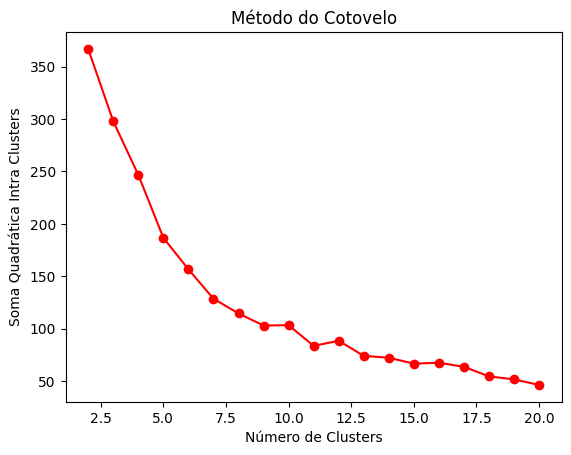

In [ ]:
n_clusters = list(range(2,21))
somas=soma_quadrado_intra_clusters(dfcluster)
plt.plot(n_clusters, somas,'-o',color='red')
plt.xlabel('Número de Clusters')
plt.ylabel('Soma Quadrática Intra Clusters')
plt.title('Método do Cotovelo')
plt.show()

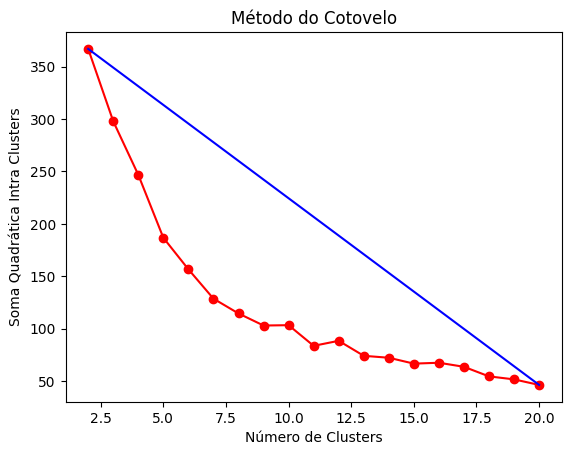

In [ ]:
plt.plot(n_clusters, somas,'-o',color='red')
plt.plot([2,20],[somas[0],somas[-1]],color='blue',)
plt.xlabel('Número de Clusters')
plt.ylabel('Soma Quadrática Intra Clusters')
plt.title('Método do Cotovelo')
plt.show()

In [ ]:
def numero_otimo_clusters(wcss):
  import math
  x0=2
  y0=wcss[0]
  x1=20
  y1=wcss[-1]
  distancias=[]
  for i in range(len(wcss)):
    x=i+2
    y=wcss[i]
    numerador = abs((y1-y0)*x - (x1-x0)*y + x1*y0 -y1*x0)
    denominador = math.sqrt((y1-y0)**2+(x1-x0)**2)
    distancias.append(numerador/denominador)
  return distancias.index(max(distancias))+2

In [ ]:
k_otimo = numero_otimo_clusters(somas)
print(f'Numero de clusters ideal: {k_otimo}')

Numero de clusters ideal: 7


In [ ]:
kmeans = KMeans(n_clusters=7, random_state=184)

In [ ]:
kmeans.fit(dfcluster)

KMeans(n_clusters=7, random_state=184)

In [ ]:
kmeans.labels_

array([6, 6, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 0, 2, 2, 3, 2, 2, 2, 2,
       3, 2, 3, 3, 3, 2, 3, 2, 3, 2, 2, 3, 2, 2, 0, 2, 2, 3, 2, 2, 2, 2,
       3, 2, 2, 2, 2, 2, 2, 0, 3, 5, 3, 2, 3, 2, 0, 3, 3, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 5, 2, 5, 3, 2, 5, 3, 2, 3, 5, 3, 5, 1, 2,
       1, 5, 5, 5, 5, 5, 5, 5, 1, 1, 2, 1, 5, 1, 1, 1, 5, 1, 1, 5, 5, 5,
       1, 5, 5, 5, 1, 5, 1, 1, 5, 1, 5, 5, 5, 5, 1, 1, 5, 5, 1, 1, 1, 1,
       1], dtype=int32)

In [ ]:
df_para_cluster_final['Cluster'] = kmeans.labels_

In [ ]:
df_para_cluster_final

,Regiao,Estado,Z_renda_media_per_capita,Z_perc_pop_10a34,Z_perc_pratica_atividade_fisica,Z_anos_medios_estudo_15mais,Z_perc_populacao_urbana,IPC_final,Cluster
0,São Paulo-cidade,São Paulo,1.562211,5.349386,1.387587,1.879657,1.393891,2.678351,6
1,Rio de Janeiro-cidade,Rio de Janeiro,1.208061,4.950816,-0.280665,1.481347,1.486726,2.088337,6
2,Distrito Federal,Distrito Federal,1.562211,-0.119593,3.009498,1.879657,1.364665,1.359117,4
3,Ribeirão Preto,São Paulo,1.562211,-0.565251,1.387587,1.879657,1.425696,0.907141,4
4,Campinas,São Paulo,1.562211,-0.688017,1.387587,1.879657,1.326844,0.860426,4
...,...,...,...,...,...,...,...,...,...
128,Ji-Paraná,Rondônia,-0.269603,-0.133047,-2.134278,-0.775745,-0.522970,-0.677522,1
129,Santa Inês - Bacabal,Maranhão,-1.466389,0.500965,-0.744068,-1.306825,-1.414353,-0.710559,1
130,Serra Talhada,Pernambuco,-1.080486,-0.011962,-0.883089,-0.775745,-1.428966,-0.724824,1
131,Arapiraca,Alagoas,-1.249013,0.245342,-0.929429,-1.439595,-1.667929,-0.797740,1


Nesta etapa, é analisada a quantidade de clusters formados em cada grupo, permitindo compreender a distribuição das observações entre os diferentes segmentos.

In [ ]:
df_para_cluster_final['Cluster'].value_counts()

,count
Cluster,
2,45
5,29
1,22
3,19
4,11
0,5
6,2


Calcula a média do IPC_final para cada cluster e ordena os resultados em ordem decrescente, permitindo identificar quais grupos apresentam os maiores valores médios de IPC.

In [ ]:
df_para_cluster_final.groupby('Cluster')['IPC_final'].mean().sort_values(ascending=False)

,IPC_final
Cluster,
6,2.383344
4,0.866238
0,0.355713
3,0.119292
2,0.090995
5,-0.433707
1,-0.553294


**Nesta etapa, é realizada a interpretação dos clusters, explicando as principais características de cada grupo e definindo as estratégias recomendadas com base nos padrões identificados.**

In [ ]:
centroides = pd.DataFrame(kmeans.cluster_centers_, columns=df_cluster.columns)
centroides

,Z_renda_media_per_capita,Z_perc_pop_10a34,Z_perc_pratica_atividade_fisica,Z_anos_medios_estudo_15mais,Z_perc_populacao_urbana
0,-0.554878,0.204644,2.425610,-0.218110,-0.025274
1,-1.039187,0.395321,-0.971557,-1.017145,-0.641084
2,0.272017,-0.292026,0.160083,0.218556,0.431258
3,1.343036,-0.690318,-1.205032,1.104000,0.540827
4,1.562211,-0.711561,1.535033,1.879657,1.160711
5,-0.952386,0.091203,0.240264,-0.954297,-1.279755
6,1.385136,5.150101,0.553461,1.680502,1.440308


Perfil: **O Cluster 6**, que chamamos de 'Mercados de Ouro', representa o perfil ideal para expansão. São territórios que combinam todos os fatores de sucesso: alto poder de compra, uma base de população jovem muito acima da média, engajamento com esportes, alta escolaridade e acesso urbano.
Recomendação: Prioridade máxima para investimento agressivo. Estes locais apresentam o menor risco e o maior potencial de retorno, devendo receber a maior parte do orçamento de expansão.

Perfil: **O Cluster 4**, que chamamos de 'Mercado Premium Adulto', representa um público de altíssimo valor. Embora a base jovem seja menor, este grupo possui o maior poder de compra, a maior escolaridade e um altíssimo engajamento com a prática esportiva.
Recomendação: Investimento estratégico com marketing direcionado. A comunicação para este cluster não deve ser focada no público jovem, mas sim em adultos com mais de 35 anos, valorizando a performance, a qualidade e a tecnologia dos produtos para um público que já é ativo e tem alta capacidade de investimento em seu bem-estar.

O **Cluster 0**, que chamamos de 'Paixão Popular', representa um mercado com altíssimo engajamento popular com o esporte, porém com poder de compra limitado. A paixão pelo esporte é o grande ativo deste grupo.
Recomendação: Entrada tática com foco em custo-benefício. A estratégia para este cluster é iniciar com projetos piloto em capitais selecionadas, oferecendo um mix de produtos acessíveis e de alto volume. O objetivo é capitalizar sobre a paixão existente, garantindo que o preço não seja uma barreira para a compra."

Perfil: **O Cluster 3**, que chamamos de 'Mercados Maduros e Inativos', é composto por territórios com alto poder de compra e escolaridade. No entanto, o perfil demográfico é mais velho e, crucialmente, o engajamento com a prática de atividade física é um dos mais baixos do país.
Recomendação: Não priorizar para investimentos. Embora a renda seja atrativa, o baixo alinhamento com o estilo de vida esportivo representa uma alta barreira para a conversão. Os recursos de expansão seriam mais bem aproveitados nos clusters com engajamento já existente.

Perfil: O **Cluster 2**, que chamamos de 'Mercados em Desenvolvimento', agrupa territórios com um perfil muito próximo à média nacional em todos os indicadores. Não possuem pontos fracos gritantes, mas também não se destacam com pontos fortes claros para o nosso negócio no momento.
Recomendação: Manter em radar, sem investimento ativo. Estes territórios devem ser monitorados periodicamente. Uma melhora futura em indicadores-chave, como renda ou prática de atividade física, pode reclassificá-los como alvos para expansão.

Perfil: Os **Clusters 1 e 5**, que agrupamos como 'Mercados de Baixa Prioridade', são territórios com desafios estruturais significativos. Ambos apresentam renda, escolaridade e níveis de urbanização muito abaixo da média nacional, o que representa barreiras consideráveis para o nosso modelo de negócio de varejo.
Recomendação: Não alocar recursos para expansão nestas regiões no momento. O foco do investimento deve ser concentrado nos clusters de maior e médio potencial para garantir o melhor retorno.

In [ ]:
df_para_cluster_final

,Regiao,Estado,Z_renda_media_per_capita,Z_perc_pop_10a34,Z_perc_pratica_atividade_fisica,Z_anos_medios_estudo_15mais,Z_perc_populacao_urbana,IPC_final,Cluster
0,São Paulo-cidade,São Paulo,1.562211,5.349386,1.387587,1.879657,1.393891,2.678351,6
1,Rio de Janeiro-cidade,Rio de Janeiro,1.208061,4.950816,-0.280665,1.481347,1.486726,2.088337,6
2,Distrito Federal,Distrito Federal,1.562211,-0.119593,3.009498,1.879657,1.364665,1.359117,4
3,Ribeirão Preto,São Paulo,1.562211,-0.565251,1.387587,1.879657,1.425696,0.907141,4
4,Campinas,São Paulo,1.562211,-0.688017,1.387587,1.879657,1.326844,0.860426,4
...,...,...,...,...,...,...,...,...,...
128,Ji-Paraná,Rondônia,-0.269603,-0.133047,-2.134278,-0.775745,-0.522970,-0.677522,1
129,Santa Inês - Bacabal,Maranhão,-1.466389,0.500965,-0.744068,-1.306825,-1.414353,-0.710559,1
130,Serra Talhada,Pernambuco,-1.080486,-0.011962,-0.883089,-0.775745,-1.428966,-0.724824,1
131,Arapiraca,Alagoas,-1.249013,0.245342,-0.929429,-1.439595,-1.667929,-0.797740,1


In [ ]:
df_teste = df_para_cluster_final.copy()
df_teste.drop(columns=['Estado', 'Z_renda_media_per_capita', 'Z_perc_pop_10a34',
       'Z_perc_pratica_atividade_fisica', 'Z_anos_medios_estudo_15mais',
       'Z_perc_populacao_urbana', 'IPC_final'],inplace=True)
df_teste

,Regiao,Cluster
0,São Paulo-cidade,6
1,Rio de Janeiro-cidade,6
2,Distrito Federal,4
3,Ribeirão Preto,4
4,Campinas,4
...,...,...
128,Ji-Paraná,1
129,Santa Inês - Bacabal,1
130,Serra Talhada,1
131,Arapiraca,1


In [ ]:
df_intermediario = df_ranqueado.copy()
Tabela_final = df_intermediario.merge(df_teste, on='Regiao', how='inner')

In [ ]:
Tabela_final

,Regiao,Estado,perc_pop_10a34,perc_populacao_urbana,renda_media_per_capita,perc_pratica_atividade_fisica,anos_medios_estudo_15mais,W_renda_media_per_capita,W_perc_pop_10a34,W_perc_pratica_atividade_fisica,W_anos_medios_estudo_15mais,W_perc_populacao_urbana,Z_renda_media_per_capita,Z_perc_pop_10a34,Z_perc_pratica_atividade_fisica,Z_anos_medios_estudo_15mais,Z_perc_populacao_urbana,IPC_final,Cluster
0,São Paulo-cidade,São Paulo,70.38,96.82,2073.0,32.5,10.7,2073.0,70.38,32.5,10.7,96.82,1.562211,5.349386,1.387587,1.879657,1.393891,2.678351,6
1,Rio de Janeiro-cidade,Rio de Janeiro,68.01,97.90,1928.0,28.9,10.4,1928.0,68.01,28.9,10.4,97.90,1.208061,4.950816,-0.280665,1.481347,1.486726,2.088337,6
2,Distrito Federal,Distrito Federal,37.86,96.48,2802.0,42.7,11.4,2073.0,37.86,36.0,10.7,96.48,1.562211,-0.119593,3.009498,1.879657,1.364665,1.359117,4
3,Ribeirão Preto,São Paulo,35.21,97.19,2073.0,32.5,10.7,2073.0,35.21,32.5,10.7,97.19,1.562211,-0.565251,1.387587,1.879657,1.425696,0.907141,4
4,Campinas,São Paulo,34.48,96.04,2073.0,32.5,10.7,2073.0,34.48,32.5,10.7,96.04,1.562211,-0.688017,1.387587,1.879657,1.326844,0.860426,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,Ji-Paraná,Rondônia,37.78,74.52,1323.0,24.9,8.7,1323.0,37.78,24.9,8.7,74.52,-0.269603,-0.133047,-2.134278,-0.775745,-0.522970,-0.677522,1
129,Santa Inês - Bacabal,Maranhão,41.55,64.15,833.0,27.9,8.3,833.0,41.55,27.9,8.3,64.15,-1.466389,0.500965,-0.744068,-1.306825,-1.414353,-0.710559,1
130,Serra Talhada,Pernambuco,38.50,63.98,991.0,27.6,8.7,991.0,38.50,27.6,8.7,63.98,-1.080486,-0.011962,-0.883089,-0.775745,-1.428966,-0.724824,1
131,Arapiraca,Alagoas,40.03,61.20,922.0,27.5,8.2,922.0,40.03,27.5,8.2,61.20,-1.249013,0.245342,-0.929429,-1.439595,-1.667929,-0.797740,1


In [ ]:
mapa_nomes_clusters1 = {
    0: "Paixão Popular",
    1: "mercados de baixa prioridade",
    2: "Mercados em desenvolvimento monitorar",
    3: "Mercados Maduros Inativo",
    4: "Mercado Premiun Adulto",
    5:'Mercados de baixa prioridade',
    6:'Mercados de ouro'

}
Tabela_final['Cluster'] = Tabela_final['Cluster'].map(mapa_nomes_clusters1)

## Clusterização de estados

In [ ]:
df_regioes1 = df_ranqueadoZ[df_ranqueadoZ['Regiao'].isin(estados)].copy()

In [ ]:
df_cluster_estado = df_regioes1.copy()
df_cluster_estado = df_cluster_estado.sort_values(by='IPC_final', ascending=False).reset_index(drop=True)
df_cluster_estado.head()

,Regiao,Estado,Z_renda_media_per_capita,Z_perc_pop_10a34,Z_perc_pratica_atividade_fisica,Z_anos_medios_estudo_15mais,Z_perc_populacao_urbana,IPC_final
0,São Paulo,São Paulo,1.562211,5.349386,1.387587,1.879657,1.601050,2.699067
1,Rio de Janeiro,Rio de Janeiro,1.208061,4.950816,-0.280665,1.481347,1.601050,2.099770
2,Distrito Federal,Distrito Federal,1.562211,-0.119593,3.009498,1.879657,1.364665,1.359117
3,Amapá,Amapá,-0.660390,0.941577,3.009498,0.419186,0.701070,0.798281
4,Mato Grosso do Sul,Mato Grosso do Sul,0.885661,-0.181817,0.460780,0.153646,0.646917,0.383366


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [ ]:
df_cluster_estado1 = df_cluster_estado.copy()
df_cluster_estado1.drop(columns=['Regiao', 'Estado', 'IPC_final'],inplace=True)

In [ ]:
df_cluster_estado2=np.array(df_cluster_estado1)

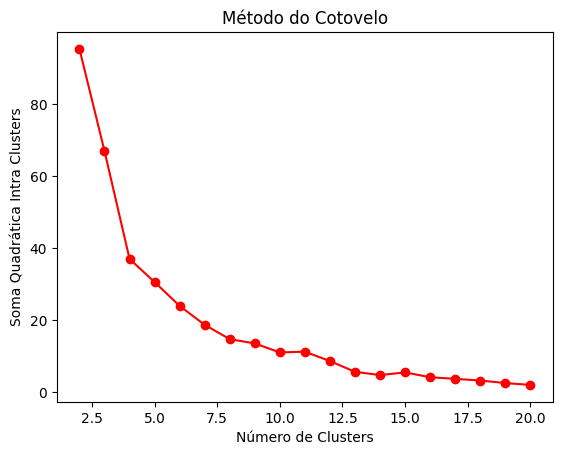

In [ ]:
n_clusters = list(range(2,21))
somas=soma_quadrado_intra_clusters(df_cluster_estado2)
plt.plot(n_clusters, somas,'-o',color='red')
plt.xlabel('Número de Clusters')
plt.ylabel('Soma Quadrática Intra Clusters')
plt.title('Método do Cotovelo')
plt.show()

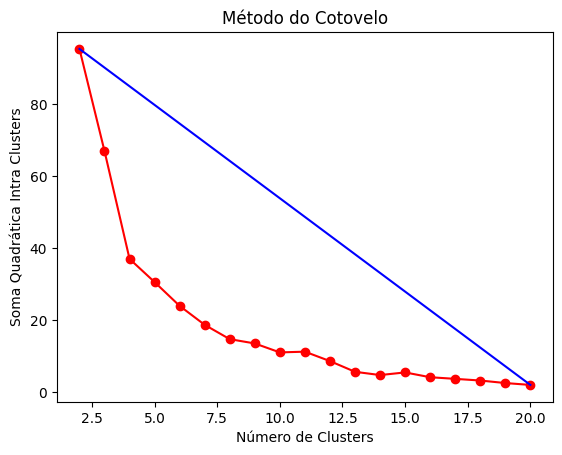

In [ ]:
plt.plot(n_clusters, somas,'-o',color='red')
plt.plot([2,20],[somas[0],somas[-1]],color='blue',)
plt.xlabel('Número de Clusters')
plt.ylabel('Soma Quadrática Intra Clusters')
plt.title('Método do Cotovelo')
plt.show()

In [ ]:
k_otimo = numero_otimo_clusters(somas)
print(f'Numero de clusters ideal: {k_otimo}')

Numero de clusters ideal: 7


In [ ]:
kmeans = KMeans(n_clusters=5, random_state=184)

In [ ]:
kmeans.fit(df_cluster_estado2)

KMeans(n_clusters=5, random_state=184)

In [ ]:
kmeans.labels_

array([0, 0, 3, 3, 1, 1, 1, 1, 4, 3, 4, 1, 1, 1, 1, 4, 4, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2], dtype=int32)

In [ ]:
df_regioes1['Cluster'] = kmeans.labels_

In [ ]:
df_regioes1

,Regiao,Estado,Z_renda_media_per_capita,Z_perc_pop_10a34,Z_perc_pratica_atividade_fisica,Z_anos_medios_estudo_15mais,Z_perc_populacao_urbana,IPC_final,Cluster
0,São Paulo,São Paulo,1.562211,5.349386,1.387587,1.879657,1.601050,2.699067,0
2,Rio de Janeiro,Rio de Janeiro,1.208061,4.950816,-0.280665,1.481347,1.601050,2.099770,0
4,Distrito Federal,Distrito Federal,1.562211,-0.119593,3.009498,1.879657,1.364665,1.359117,3
12,Amapá,Amapá,-0.660390,0.941577,3.009498,0.419186,0.701070,0.798281,3
22,Mato Grosso do Sul,Mato Grosso do Sul,0.885661,-0.181817,0.460780,0.153646,0.646917,0.383366,1
26,Paraná,Paraná,0.900316,-0.450893,0.182738,0.817496,0.717402,0.324864,1
39,Santa Catarina,Santa Catarina,1.281333,-0.344945,-1.253812,1.215806,0.666687,0.218404,1
41,Goiás,Goiás,0.377638,-0.128002,-0.095304,0.419186,1.081864,0.205935,1
46,Roraima,Roraima,-0.457669,0.891125,0.136398,0.286416,-0.208364,0.165122,4
48,Rio Grande do Norte,Rio Grande do Norte,-0.484536,-0.166681,2.036351,-0.642975,0.118276,0.159435,3


In [ ]:
df_regioes1.groupby('Cluster')['IPC_final'].mean().sort_values(ascending=False)

,IPC_final
Cluster,
0,2.399418
3,0.772278
1,0.167826
4,0.041870
2,-0.495186


In [ ]:
# lista_estados = ['São Paulo', 'Rio de Janeiro', 'Distrito Federal', 'Amapá',
#        'Paraná', 'Mato Grosso do Sul', 'Goiás', 'Santa Catarina',
#        'Tocantins', 'Rio Grande do Norte', 'Roraima', 'Mato Grosso',
#        'Minas Gerais', 'Espírito Santo', 'Rio Grande do Sul', 'Amazonas',
#        'Sergipe', 'Acre', 'Ceará', 'Pará', 'Piauí', 'Bahia', 'Paraíba',
#        'Rondônia', 'Pernambuco', 'Alagoas', 'Maranhão']

In [ ]:
teste = df_ranqueado1.copy()
teste

,Regiao,Estado,perc_pop_10a34,perc_populacao_urbana,renda_media_per_capita,perc_pratica_atividade_fisica,anos_medios_estudo_15mais,W_renda_media_per_capita,W_perc_pop_10a34,W_perc_pratica_atividade_fisica,W_anos_medios_estudo_15mais,W_perc_populacao_urbana,Z_renda_media_per_capita,Z_perc_pop_10a34,Z_perc_pratica_atividade_fisica,Z_anos_medios_estudo_15mais,Z_perc_populacao_urbana,IPC_final
0,São Paulo,São Paulo,70.38,99.23,2073.0,32.5,10.7,2073.0,70.38,32.5,10.7,99.23,1.562211,5.349386,1.387587,1.879657,1.601050,2.699067
2,Rio de Janeiro,Rio de Janeiro,68.01,99.49,1928.0,28.9,10.4,1928.0,68.01,28.9,10.4,99.23,1.208061,4.950816,-0.280665,1.481347,1.601050,2.099770
12,Amapá,Amapá,44.17,88.76,1163.0,36.0,9.6,1163.0,44.17,36.0,9.6,88.76,-0.660390,0.941577,3.009498,0.419186,0.701070,0.798281
22,Mato Grosso do Sul,Mato Grosso do Sul,37.49,88.13,1796.0,30.5,9.4,1796.0,37.49,30.5,9.4,88.13,0.885661,-0.181817,0.460780,0.153646,0.646917,0.383366
26,Paraná,Paraná,35.89,88.95,1802.0,29.9,9.9,1802.0,35.89,29.9,9.9,88.95,0.900316,-0.450893,0.182738,0.817496,0.717402,0.324864
39,Santa Catarina,Santa Catarina,36.52,88.36,1958.0,26.8,10.2,1958.0,36.52,26.8,10.2,88.36,1.281333,-0.344945,-1.253812,1.215806,0.666687,0.218404
41,Goiás,Goiás,37.81,93.19,1588.0,29.3,9.6,1588.0,37.81,29.3,9.6,93.19,0.377638,-0.128002,-0.095304,0.419186,1.081864,0.205935
46,Roraima,Roraima,43.87,78.18,1246.0,29.8,9.5,1246.0,43.87,29.8,9.5,78.18,-0.457669,0.891125,0.136398,0.286416,-0.208364,0.165122
48,Rio Grande do Norte,Rio Grande do Norte,37.58,81.98,1235.0,33.9,8.8,1235.0,37.58,33.9,8.8,81.98,-0.484536,-0.166681,2.036351,-0.642975,0.118276,0.159435
55,Tocantins,Tocantins,39.73,82.89,1358.0,30.5,9.3,1358.0,39.73,30.5,9.3,82.89,-0.184118,0.194890,0.460780,0.020876,0.196498,0.117125


In [ ]:
df_estados = df_regioes1.copy()
df_estados = df_estados.loc[df_estados.index != 4]
df_estados.drop(columns=['Estado', 'Z_renda_media_per_capita', 'Z_perc_pop_10a34',
       'Z_perc_pratica_atividade_fisica', 'Z_anos_medios_estudo_15mais',
       'Z_perc_populacao_urbana', 'IPC_final', ],inplace=True)
t1 = teste.merge(df_estados, on='Regiao', how='left')

In [ ]:
t1

,Regiao,Estado,perc_pop_10a34,perc_populacao_urbana,renda_media_per_capita,perc_pratica_atividade_fisica,anos_medios_estudo_15mais,W_renda_media_per_capita,W_perc_pop_10a34,W_perc_pratica_atividade_fisica,W_anos_medios_estudo_15mais,W_perc_populacao_urbana,Z_renda_media_per_capita,Z_perc_pop_10a34,Z_perc_pratica_atividade_fisica,Z_anos_medios_estudo_15mais,Z_perc_populacao_urbana,IPC_final,Cluster
0,São Paulo,São Paulo,70.38,99.23,2073.0,32.5,10.7,2073.0,70.38,32.5,10.7,99.23,1.562211,5.349386,1.387587,1.879657,1.601050,2.699067,0
1,Rio de Janeiro,Rio de Janeiro,68.01,99.49,1928.0,28.9,10.4,1928.0,68.01,28.9,10.4,99.23,1.208061,4.950816,-0.280665,1.481347,1.601050,2.099770,0
2,Amapá,Amapá,44.17,88.76,1163.0,36.0,9.6,1163.0,44.17,36.0,9.6,88.76,-0.660390,0.941577,3.009498,0.419186,0.701070,0.798281,3
3,Mato Grosso do Sul,Mato Grosso do Sul,37.49,88.13,1796.0,30.5,9.4,1796.0,37.49,30.5,9.4,88.13,0.885661,-0.181817,0.460780,0.153646,0.646917,0.383366,1
4,Paraná,Paraná,35.89,88.95,1802.0,29.9,9.9,1802.0,35.89,29.9,9.9,88.95,0.900316,-0.450893,0.182738,0.817496,0.717402,0.324864,1
5,Santa Catarina,Santa Catarina,36.52,88.36,1958.0,26.8,10.2,1958.0,36.52,26.8,10.2,88.36,1.281333,-0.344945,-1.253812,1.215806,0.666687,0.218404,1
6,Goiás,Goiás,37.81,93.19,1588.0,29.3,9.6,1588.0,37.81,29.3,9.6,93.19,0.377638,-0.128002,-0.095304,0.419186,1.081864,0.205935,1
7,Roraima,Roraima,43.87,78.18,1246.0,29.8,9.5,1246.0,43.87,29.8,9.5,78.18,-0.457669,0.891125,0.136398,0.286416,-0.208364,0.165122,4
8,Rio Grande do Norte,Rio Grande do Norte,37.58,81.98,1235.0,33.9,8.8,1235.0,37.58,33.9,8.8,81.98,-0.484536,-0.166681,2.036351,-0.642975,0.118276,0.159435,3
9,Tocantins,Tocantins,39.73,82.89,1358.0,30.5,9.3,1358.0,39.73,30.5,9.3,82.89,-0.184118,0.194890,0.460780,0.020876,0.196498,0.117125,4


In [ ]:
centroides2 = pd.DataFrame(kmeans.cluster_centers_, columns=df_cluster_estado1.columns)
centroides2

,Z_renda_media_per_capita,Z_perc_pop_10a34,Z_perc_pratica_atividade_fisica,Z_anos_medios_estudo_15mais,Z_perc_populacao_urbana
0,1.385136,5.150101,0.553461,1.680502,1.601050
1,0.763540,-0.380051,-0.327005,0.518764,0.663034
2,-0.966914,0.139393,-0.535537,-1.054562,-0.343662
3,0.139095,0.218434,2.685115,0.551956,0.728004
4,-0.630471,0.497601,0.449195,-0.111894,0.030814


In [ ]:
df_regioes1.groupby('Cluster')['IPC_final'].mean().sort_values(ascending=False)

,IPC_final
Cluster,
0,2.399418
3,0.772278
1,0.167826
4,0.041870
2,-0.495186


Cluster 0: A Potência Completa
Insight: Este cluster representa os estados de maior potencial no país, com desempenho muito acima da média em todos os cinco indicadores analisados: Renda, População Jovem, Prática de Atividade Física, Anos de Estudo e Urbanização.

Recomendação: Prioridade Máxima para Investimento. Alocar a maior parte do orçamento de expansão para estes estados, com foco em lojas-conceito, marketing de grande escala e um portfólio completo de produtos, incluindo os de maior valor agregado.

Cluster 3: A Paixão Popular
Insight: Este cluster tem um perfil único: o engajamento com a prática de atividade física é o mais alto de todo o Brasil, e a população jovem é presente. O principal desafio é a renda, que se encontra na média nacional, não acompanhando a intensidade da paixão pelo esporte.

Recomendação: Entrada Tática com Foco em Custo-Benefício. Iniciar com projetos piloto em capitais selecionadas, oferecendo produtos de alto giro e preço acessível. O objetivo é capitalizar sobre a demanda existente sem que o preço seja uma barreira.

Cluster 1: Mercados Sólidos e Equilibrados
Insight: Agrupa estados economicamente fortes, com renda, escolaridade e urbanização acima da média. No entanto, o público-alvo jovem e o engajamento com a prática de atividade física estão ligeiramente abaixo da média nacional.

Recomendação: Investimento Estratégico com Marketing Direcionado. O foco da comunicação deve ser o público adulto (30+), valorizando os benefícios de saúde, qualidade e tecnologia dos produtos para incentivar a adesão ao esporte neste grupo de alto poder aquisitivo.



Cluster 4: Potencial Jovem a Desenvolver
Insight: O grande atrativo deste cluster é seu bônus demográfico, com uma população jovem bem acima da média. O interesse por esportes também é positivo. Contudo, o poder de compra e o nível de escolaridade ainda estão abaixo da média.

Recomendação: Monitorar e Construir a Marca. A estratégia para estes estados deve ser focada no longo prazo. Construir a presença da marca através do e-commerce e marketing digital direcionado ao público jovem, preparando o terreno para capitalizar sobre o crescimento econômico futuro da região.

In [ ]:
mapa_nomes_clusters = {
    0: "Estados Potência completa",
    1: "Estados Mercados Maduros de Alto Valor, markaeting 30+",
    2: "Estados Baixo retorno evitar ",
    3: "Estado com Potencial de investimento",
    4: "Estado adequado para o publico porem com baixa renda(monitorar)"
}
df_regioes1['Cluster'] = df_regioes1['Cluster'].map(mapa_nomes_clusters)

In [ ]:
Estados_final = df_regioes1

## Tabelas Finais

In [ ]:
Estados_final.head()

,Regiao,Estado,Z_renda_media_per_capita,Z_perc_pop_10a34,Z_perc_pratica_atividade_fisica,Z_anos_medios_estudo_15mais,Z_perc_populacao_urbana,IPC_final,Cluster
0,São Paulo,São Paulo,1.562211,5.349386,1.387587,1.879657,1.601050,2.699067,Estados Potência completa
2,Rio de Janeiro,Rio de Janeiro,1.208061,4.950816,-0.280665,1.481347,1.601050,2.099770,Estados Potência completa
4,Distrito Federal,Distrito Federal,1.562211,-0.119593,3.009498,1.879657,1.364665,1.359117,Estado com Potencial de investimento
12,Amapá,Amapá,-0.660390,0.941577,3.009498,0.419186,0.701070,0.798281,Estado com Potencial de investimento
22,Mato Grosso do Sul,Mato Grosso do Sul,0.885661,-0.181817,0.460780,0.153646,0.646917,0.383366,"Estados Mercados Maduros de Alto Valor, markae..."


In [ ]:
Tabela_final

,Regiao,Estado,perc_pop_10a34,perc_populacao_urbana,renda_media_per_capita,perc_pratica_atividade_fisica,anos_medios_estudo_15mais,W_renda_media_per_capita,W_perc_pop_10a34,W_perc_pratica_atividade_fisica,W_anos_medios_estudo_15mais,W_perc_populacao_urbana,Z_renda_media_per_capita,Z_perc_pop_10a34,Z_perc_pratica_atividade_fisica,Z_anos_medios_estudo_15mais,Z_perc_populacao_urbana,IPC_final,Cluster
0,São Paulo-cidade,São Paulo,70.38,96.82,2073.0,32.5,10.7,2073.0,70.38,32.5,10.7,96.82,1.562211,5.349386,1.387587,1.879657,1.393891,2.678351,Mercados de ouro
1,Rio de Janeiro-cidade,Rio de Janeiro,68.01,97.90,1928.0,28.9,10.4,1928.0,68.01,28.9,10.4,97.90,1.208061,4.950816,-0.280665,1.481347,1.486726,2.088337,Mercados de ouro
2,Distrito Federal,Distrito Federal,37.86,96.48,2802.0,42.7,11.4,2073.0,37.86,36.0,10.7,96.48,1.562211,-0.119593,3.009498,1.879657,1.364665,1.359117,Mercado Premiun Adulto
3,Ribeirão Preto,São Paulo,35.21,97.19,2073.0,32.5,10.7,2073.0,35.21,32.5,10.7,97.19,1.562211,-0.565251,1.387587,1.879657,1.425696,0.907141,Mercado Premiun Adulto
4,Campinas,São Paulo,34.48,96.04,2073.0,32.5,10.7,2073.0,34.48,32.5,10.7,96.04,1.562211,-0.688017,1.387587,1.879657,1.326844,0.860426,Mercado Premiun Adulto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,Ji-Paraná,Rondônia,37.78,74.52,1323.0,24.9,8.7,1323.0,37.78,24.9,8.7,74.52,-0.269603,-0.133047,-2.134278,-0.775745,-0.522970,-0.677522,mercados de baixa prioridade
129,Santa Inês - Bacabal,Maranhão,41.55,64.15,833.0,27.9,8.3,833.0,41.55,27.9,8.3,64.15,-1.466389,0.500965,-0.744068,-1.306825,-1.414353,-0.710559,mercados de baixa prioridade
130,Serra Talhada,Pernambuco,38.50,63.98,991.0,27.6,8.7,991.0,38.50,27.6,8.7,63.98,-1.080486,-0.011962,-0.883089,-0.775745,-1.428966,-0.724824,mercados de baixa prioridade
131,Arapiraca,Alagoas,40.03,61.20,922.0,27.5,8.2,922.0,40.03,27.5,8.2,61.20,-1.249013,0.245342,-0.929429,-1.439595,-1.667929,-0.797740,mercados de baixa prioridade


In [ ]:
Tabela_final.groupby('Cluster')['IPC_final'].mean().sort_values(ascending=False)

,IPC_final
Cluster,
Mercados de ouro,2.383344
Mercado Premiun Adulto,0.866238
Paixão Popular,0.355713
Mercados Maduros Inativo,0.119292
Mercados em desenvolvimento monitorar,0.090995
Mercados de baixa prioridade,-0.433707
mercados de baixa prioridade,-0.553294


In [ ]:
Tabela_final.to_csv('Tabela_final.csv', index=False)
Estados_final.to_csv('Estados_final.csv', index=False)

In [ ]:
#Colocando as colunas em ordem
colunas_para_manter = ['Regiao','Estado','IPC_final','Cluster','renda_media_per_capita',
                       'perc_pop_10a34','perc_pratica_atividade_fisica','anos_medios_estudo_15mais',
                       'perc_populacao_urbana','Z_renda_media_per_capita','Z_perc_pop_10a34',
                       'Z_perc_pratica_atividade_fisica','Z_anos_medios_estudo_15mais',
                       'Z_perc_populacao_urbana']


df_excel_canonico = Tabela_final[colunas_para_manter]


df_excel_canonico.to_excel("entregavel_thm.xlsx", sheet_name="Ranking_e_Clusters", index=False)#salvando para arquivo .xlsx

In [ ]:
df_excel_canonico

,Regiao,Estado,IPC_final,Cluster,renda_media_per_capita,perc_pop_10a34,perc_pratica_atividade_fisica,anos_medios_estudo_15mais,perc_populacao_urbana,Z_renda_media_per_capita,Z_perc_pop_10a34,Z_perc_pratica_atividade_fisica,Z_anos_medios_estudo_15mais,Z_perc_populacao_urbana
0,São Paulo-cidade,São Paulo,2.678351,Mercados de ouro,2073.0,70.38,32.5,10.7,96.82,1.562211,5.349386,1.387587,1.879657,1.393891
1,Rio de Janeiro-cidade,Rio de Janeiro,2.088337,Mercados de ouro,1928.0,68.01,28.9,10.4,97.90,1.208061,4.950816,-0.280665,1.481347,1.486726
2,Distrito Federal,Distrito Federal,1.359117,Mercado Premiun Adulto,2802.0,37.86,42.7,11.4,96.48,1.562211,-0.119593,3.009498,1.879657,1.364665
3,Ribeirão Preto,São Paulo,0.907141,Mercado Premiun Adulto,2073.0,35.21,32.5,10.7,97.19,1.562211,-0.565251,1.387587,1.879657,1.425696
4,Campinas,São Paulo,0.860426,Mercado Premiun Adulto,2073.0,34.48,32.5,10.7,96.04,1.562211,-0.688017,1.387587,1.879657,1.326844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,Ji-Paraná,Rondônia,-0.677522,mercados de baixa prioridade,1323.0,37.78,24.9,8.7,74.52,-0.269603,-0.133047,-2.134278,-0.775745,-0.522970
129,Santa Inês - Bacabal,Maranhão,-0.710559,mercados de baixa prioridade,833.0,41.55,27.9,8.3,64.15,-1.466389,0.500965,-0.744068,-1.306825,-1.414353
130,Serra Talhada,Pernambuco,-0.724824,mercados de baixa prioridade,991.0,38.50,27.6,8.7,63.98,-1.080486,-0.011962,-0.883089,-0.775745,-1.428966
131,Arapiraca,Alagoas,-0.797740,mercados de baixa prioridade,922.0,40.03,27.5,8.2,61.20,-1.249013,0.245342,-0.929429,-1.439595,-1.667929


## Graficos

Top 10 regiões com maior potencial de consumo

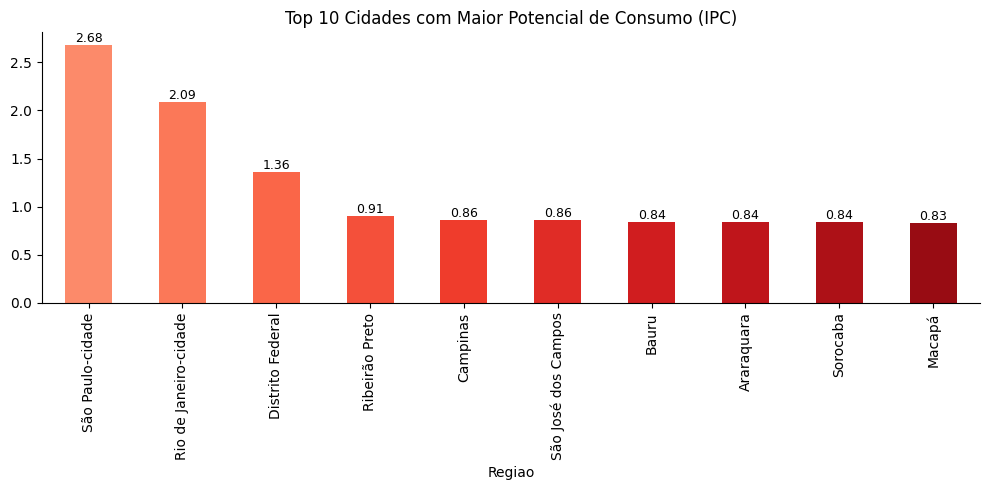

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Seleciona os top 10
top10 = df_excel_canonico[['Regiao', 'IPC_final']].sort_values(by='IPC_final', ascending=False).head(10)

# Cria uma paleta de tons de vermelho
cores = cm.Reds(np.linspace(0.4, 0.9, len(top10)))  # intervalo ajustado para tons bonitos

# Cria o gráfico de barras
ax = top10.plot(
    kind='bar',
    x='Regiao',
    y='IPC_final',
    figsize=(10, 5),
    color=cores,
    title='Top 10 Cidades com Maior Potencial de Consumo (IPC)',
    legend=False
)

# Adiciona os valores no topo das barras
for p in ax.patches:
    ax.annotate(
        str(round(p.get_height(), 2)),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='bottom',
        fontsize=9,
        color='black'
    )

# Remove linhas superior e lateral direita
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Ajusta o layout
plt.tight_layout()
plt.show()


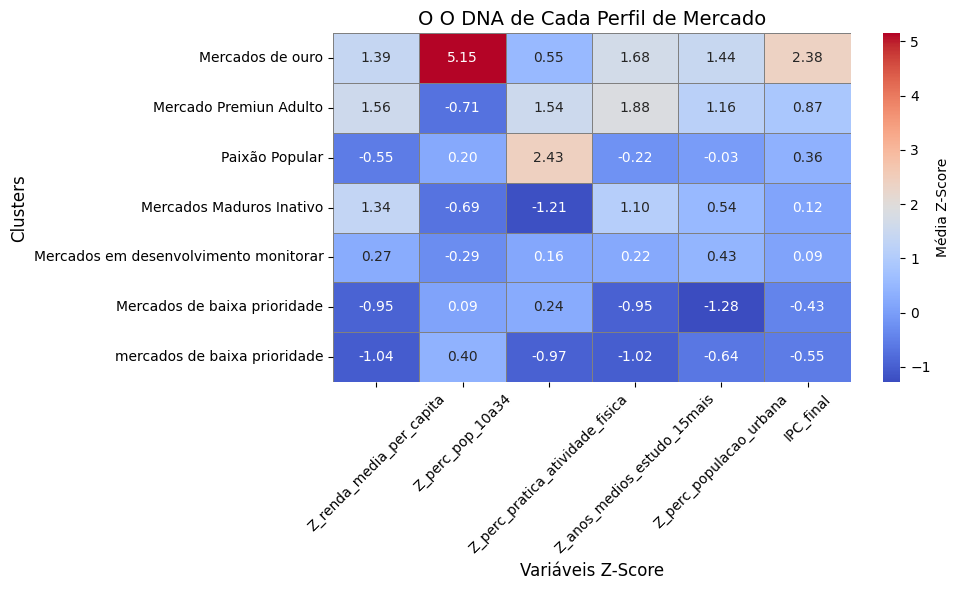

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Colunas Z-score
colunas_z = [
    'Z_renda_media_per_capita',
    'Z_perc_pop_10a34',
    'Z_perc_pratica_atividade_fisica',
    'Z_anos_medios_estudo_15mais',
    'Z_perc_populacao_urbana','IPC_final'
]

# Calcula a média por cluster
df_heatmap = df_excel_canonico.groupby('Cluster')[colunas_z].mean()

# Se quiser ordenar os clusters por uma variável específica, ex: Z_renda_media_per_capita
df_heatmap = df_heatmap.sort_values(by='IPC_final', ascending=False)

# Cria o heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    df_heatmap,
    annot=True,          # mostra os valores nas células
    fmt=".2f",           # formato dos números
    cmap="coolwarm",     # paleta divergente (opcional)
    cbar_kws={'label': 'Média Z-Score'},
    linewidths=0.5,      # linhas entre células
    linecolor='gray'
)

plt.title("O O DNA de Cada Perfil de Mercado", fontsize=14)
plt.xlabel("Variáveis Z-Score", fontsize=12)
plt.ylabel("Clusters", fontsize=12)
plt.yticks(rotation=0)   # mantém os nomes dos clusters na horizontal
plt.xticks(rotation=45)  # rotaciona nomes das variáveis para caber melhor
plt.tight_layout()       # ajusta espaçamento
plt.show()


/tmp/ipython-input-3401008378.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


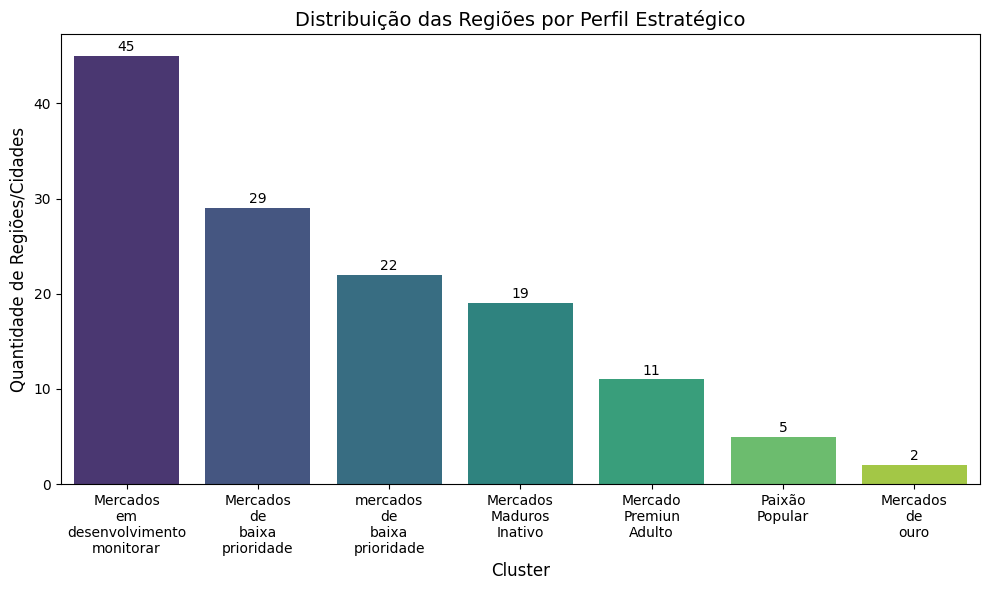

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Conta quantas cidades/regiões existem em cada cluster
contagem_clusters = df_excel_canonico['Cluster'].value_counts().reset_index()
contagem_clusters.columns = ['Cluster', 'Quantidade']

# Ordena do maior para o menor
contagem_clusters = contagem_clusters.sort_values(by='Quantidade', ascending=False)

# Quebra nomes longos em múltiplas linhas
contagem_clusters['Cluster_label'] = contagem_clusters['Cluster'].apply(lambda x: '\n'.join(x.split()))

# Cria o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(
    data=contagem_clusters,
    x='Cluster_label',
    y='Quantidade',
    palette='viridis'
)

# Adiciona valores no topo das barras
for index, row in contagem_clusters.iterrows():
    plt.text(
        x=index,
        y=row['Quantidade'] + 0.5,
        s=row['Quantidade'],
        ha='center'
    )

plt.title("Distribuição das Regiões por Perfil Estratégico", fontsize=14)
plt.xlabel("Cluster", fontsize=12)
plt.ylabel("Quantidade de Regiões/Cidades", fontsize=12)
plt.xticks(rotation=0)  # agora horizontal
plt.tight_layout()
plt.show()


/tmp/ipython-input-762969563.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_pesos, x='Indicador', y='Peso', palette='Reds')


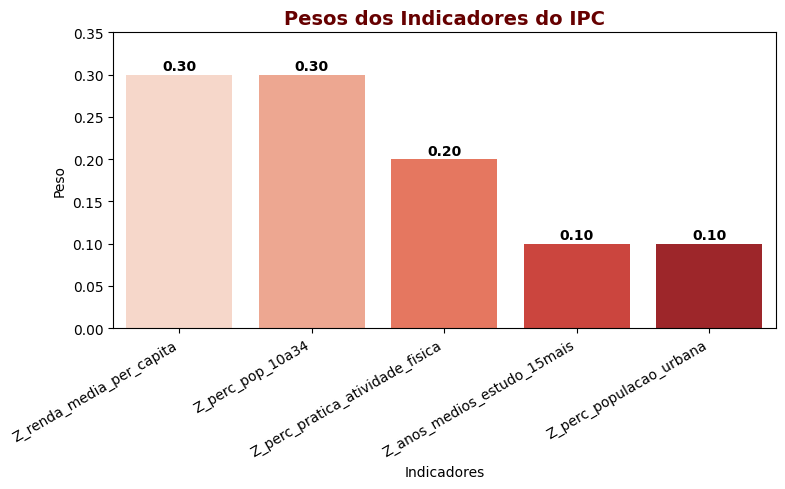

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Dados fornecidos
pesos_ipc = {
    'Z_renda_media_per_capita': 0.30,
    'Z_perc_pop_10a34': 0.30,
    'Z_perc_pratica_atividade_fisica': 0.20,
    'Z_anos_medios_estudo_15mais': 0.10,
    'Z_perc_populacao_urbana': 0.10
}

# Converter o dicionário em DataFrame
df_pesos = pd.DataFrame(list(pesos_ipc.items()), columns=['Indicador', 'Peso'])
df_pesos = df_pesos.sort_values('Peso', ascending=False)

# Criar o gráfico de barras (tons de vermelho)
plt.figure(figsize=(8, 5))
sns.barplot(data=df_pesos, x='Indicador', y='Peso', palette='Reds')

# Adicionar rótulos acima das barras
for i, v in enumerate(df_pesos['Peso']):
    plt.text(i, v + 0.005, f'{v:.2f}', ha='center', fontweight='bold')

# Ajustes de layout e estilo
plt.title('Pesos dos Indicadores do IPC', fontsize=14, fontweight='bold', color='#660000')
plt.xlabel('Indicadores')
plt.ylabel('Peso')
plt.xticks(rotation=30, ha='right')
plt.ylim(0, 0.35)
plt.tight_layout()
plt.show()
